<a href="https://colab.research.google.com/github/kailash-jagadeesh/mnist_recog/blob/master/keras_trained1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow keras numpy mnist matplotlib


In [0]:
import numpy as np 
import mnist # Get data set from
from keras.models import Sequential #ANN architecture
from keras. layers import Dense # The layers in the ANN
from keras.utils import to_categorical
import matplotlib.pyplot as plt # Graph


Using TensorFlow backend.


In [0]:
#Load the data set
train_images = mnist.train_images() # training data of images
train_labels = mnist.train_labels() # training data of the labels
test_images = mnist. test_images()  # testing data images
test_labels = mnist.test_labels()   # testing data labels


In [0]:
print(type(train_images))
train_images=train_images+test_images
print(train_images.shape)

<class 'numpy.ndarray'>


ValueError: ignored

In [0]:
_,train_images=cv2.threshold(train_images,100,255,cv2.THRESH_BINARY)
_,test_images=cv2.threshold(test_images,100,255,cv2.THRESH_BINARY)
train_images = (train_images / 255) - 0.5
test_images = (test_images/ 255) - 0.5

#Flatten the images. Flatten each 28 x 28 image into a 784= 28^2 
#dimensional vector and pass into the neural network
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1,784))
#print the new image shape
print(train_images.shape) #60,000 rows and 784 cols
print(test_images.shape)  #10,000 rows and 784 cols

(60000, 784)
(10000, 784)


In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(
  optimizer= 'adam',
    loss = 'categorical_crossentropy', #loss function for classes > 2
    metrics = ['accuracy']
)

In [0]:
model.fit(
    train_images, #The training data images
    to_categorical(train_labels),#The trainind data labels, label data only returns a single digit representing the class of each label Ex: train_labels = 2,to_categorical(2)= [0,0,1,0,0,0,0,0,0,0]
    epochs=50, #Number of iterations over the entire data set to train on
    batch_size = 20 #The number of samples per gradient update for training
)

Epoch 1/50
60000/60000 [==============================] - 12s 196us/step - loss: 0.3158 - acc: 0.9022
Epoch 2/50
60000/60000 [==============================] - 11s 183us/step - loss: 0.1617 - acc: 0.9499
Epoch 3/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.1271 - acc: 0.9601
Epoch 4/50
60000/60000 [==============================] - 11s 180us/step - loss: 0.1067 - acc: 0.9666
Epoch 5/50
60000/60000 [==============================] - 11s 180us/step - loss: 0.0898 - acc: 0.9719
Epoch 6/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.0756 - acc: 0.9759
Epoch 7/50
60000/60000 [==============================] - 11s 191us/step - loss: 0.0695 - acc: 0.9774
Epoch 8/50
60000/60000 [==============================] - 11s 188us/step - loss: 0.0654 - acc: 0.9789
Epoch 9/50
60000/60000 [==============================] - 11s 191us/step - loss: 0.0579 - acc: 0.9812
Epoch 10/50
60000/60000 [==============================] - 11s 183us/step - loss: 

In [0]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 36us/step


[0.20472474576569039, 0.9692]

In [0]:
model.save_weights('model.h5')

In [0]:
predictions = model.predict(test_images[100:115])
#print(predictions)
print (np.argmax(predictions, axis =1))


[6 0 5 4 5 9 2 1 9 4 8 7 3 9 7]


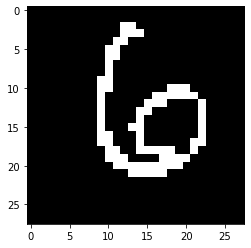

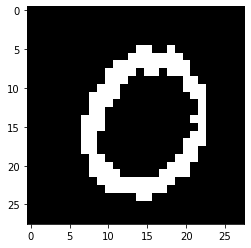

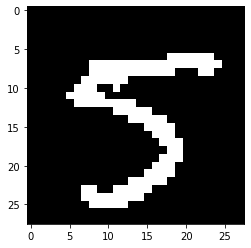

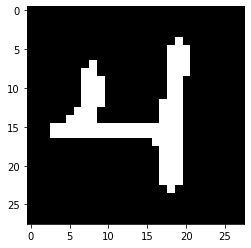

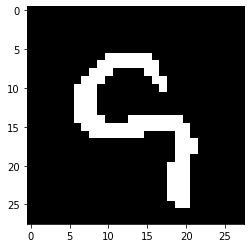

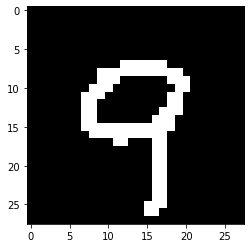

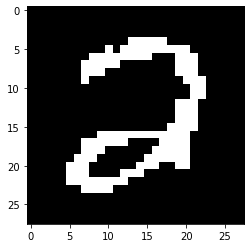

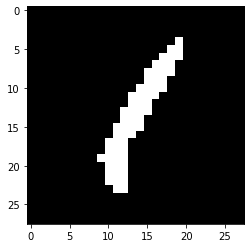

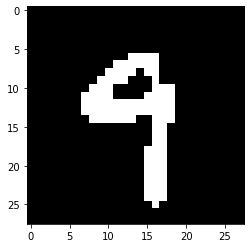

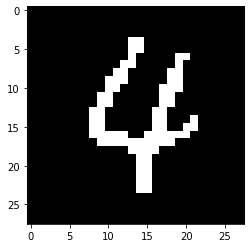

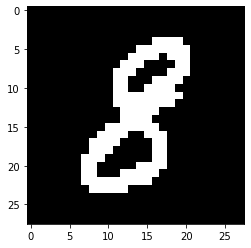

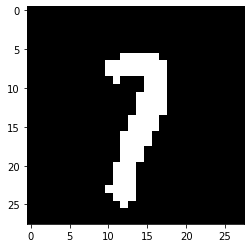

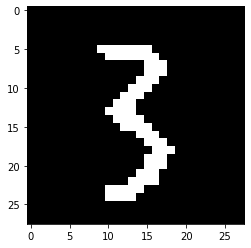

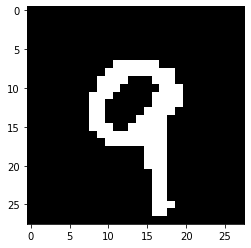

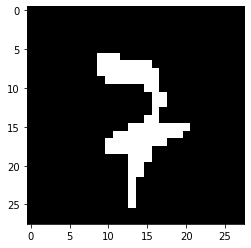

In [0]:
import matplotlib.pyplot as plt
for i in range(100,115):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()

In [0]:
first_image=test_images[5]
print(first_image.shape)


(784,)


In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 4.jpg to 4.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
User uploaded file "0.jpg" with length 19307 bytes
User uploaded file "4.jpg" with length 19299 bytes
User uploaded file "6.jpg" with length 19596 bytes
User uploaded file "7.jpg" with length 19282 bytes


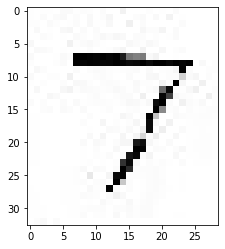

In [0]:
import cv2
img=cv2.imread('7.jpg',0)
img= (img/255)-0.5
first_image = np.array(img, dtype='float')
#pixels = first_image.reshape((28, 28))
plt.imshow(first_image, cmap='gray')
plt.show()

In [0]:
print(img.shape)

(33, 29)


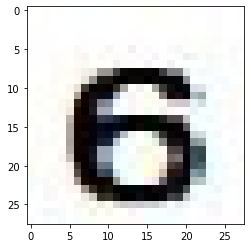

NameError: ignored

In [0]:
from PIL import Image 
im=Image.open('6.jpg')
im=im.resize((28,28))
plt.imshow(im, cmap='gray')
plt.show()
im=np.array(im)
im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#im=cv2.bitwise_not(im)
_,im=cv2.threshold(im,160,255,cv2.THRESH_BINARY_INV)
kern=np.ones((2,2),np.uint8)
#im=cv2.dilate(im,kern,2)
im=cv2.erode(im,kern,1)
plt.imshow(im, cmap='gray')
plt.show()


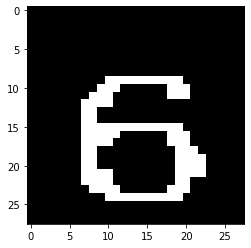

(28, 28)


In [0]:
temp_img=im
temp_img=np.array(temp_img,dtype='float')
plt.imshow(temp_img, cmap='gray')
plt.show()
print(temp_img.shape)

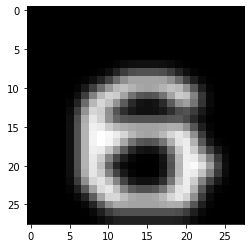

(28, 28)


In [0]:
temp_img = cv2.GaussianBlur(temp_img,(5,5),0)
plt.imshow(temp_img, cmap='gray')
plt.show()
print(temp_img.shape)

In [0]:
temp_img=temp_img.reshape((1,784))
prediction = model.predict(temp_img)
#print(predictions)
print (np.argmax(prediction, axis =1))


[5]


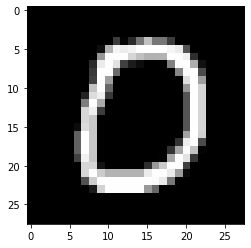

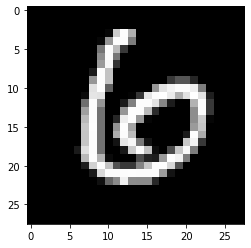

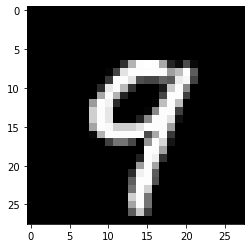

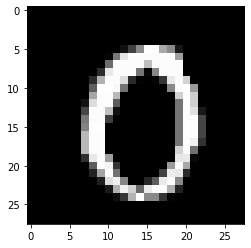

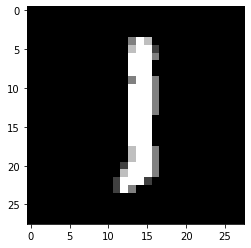

In [0]:
for i in range(10,15):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()

In [0]:
import os

print(os.getcwd())

/content


In [0]:

from keras.datasets import mnist
from PIL import Image
import numpy as np
import os
import cv2

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(type(y_train[9]))
X_train2=[]

def load_images_to_data(image_label, image_directory, features_data, label_data):
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        image_file_name = os.path.join(image_directory, file)
        if ".jpg" in image_file_name:
            from PIL import Image
            img = Image.open(image_file_name)
            img = img.resize((28, 28))
            img = np.array(img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            print(img.shape)
            # im=cv2.bitwise_not(im)
            #_, img = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY_INV)
            X_train2.append(img)
    return features_data, label_data

_,_=load_images_to_data()
for i in X_train:
    X_train2.append(X_train[i])
X_train2=np.array(X_train2)
print(X_train2.shape)